In [ ]:
Joshua Patrick G. Chiu

### DATA EXPLORATION

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1

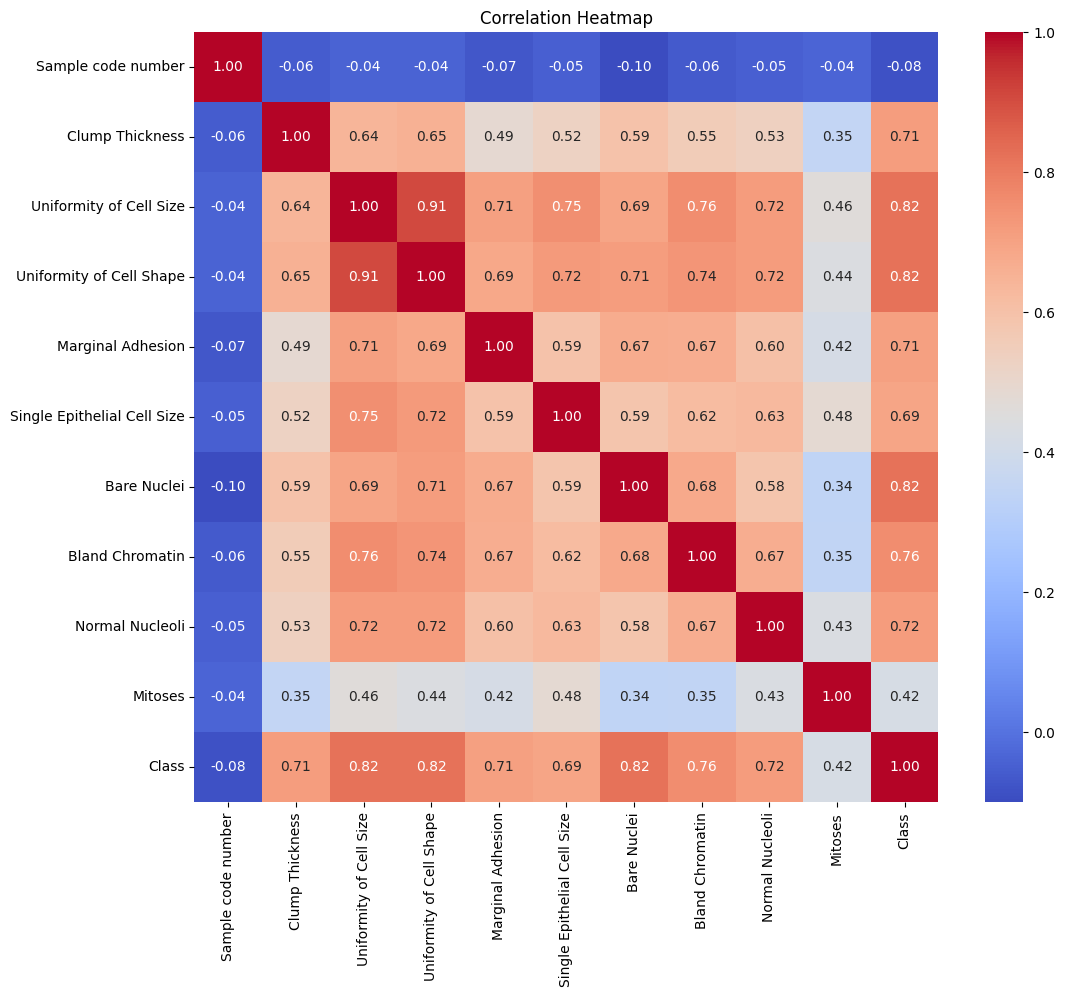

Top 5 correlated features with the target:
Bare Nuclei                 0.822696
Uniformity of Cell Shape    0.821891
Uniformity of Cell Size     0.820801
Bland Chromatin             0.758228
Normal Nucleoli             0.718677
Name: Class, dtype: float64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 
                'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv(url, names=column_names)

print(data.head())

data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data['Class'] = data['Class'].map({2: 0, 4: 1})

corr = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

target_corr = corr['Class'].abs().sort_values(ascending=False)
top_5_correlated = target_corr[1:6]  
print("Top 5 correlated features with the target:")
print(top_5_correlated)

### TRAIN | TEST SPLIT

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen


column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 
                'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv(url, names=column_names)

print(data.head())

data.replace('?', pd.NA, inplace=True)
data.dropna(inplace=True)
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data['Class'] = data['Class'].map({2: 0, 4: 1})

corr = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

target_corr = corr['Class'].abs().sort_values(ascending=False)
top_5_correlated = target_corr[1:6]  
print("Top 5 correlated features with the target:")
print(top_5_correlated)

### TRAIN | TEST SPLIT

Best parameters: {'knn__n_neighbors': 8, 'knn__weights': 'uniform'}
Best accuracy: 0.9690639873083026


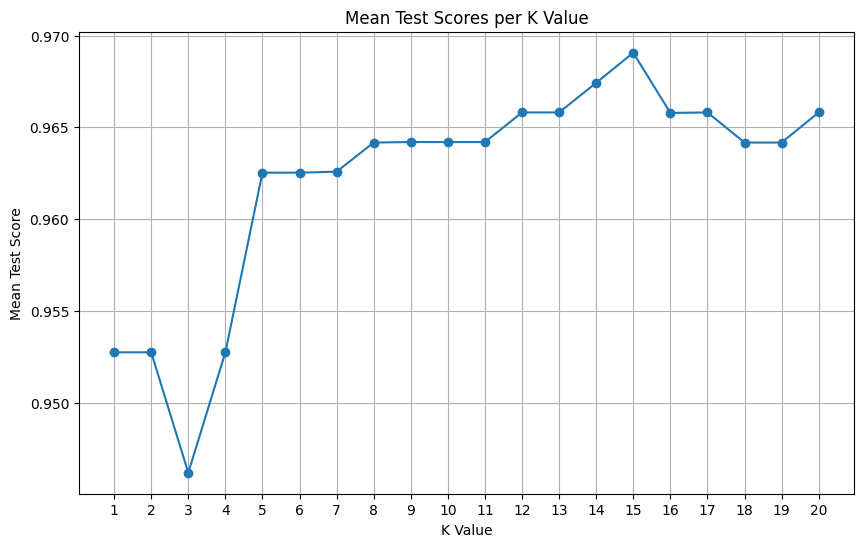

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Split the data into features and labels
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training set, validation set, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1 / 0.9, random_state=42)
# Pipeline that contains both a StandardScaler and KNN model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Grid-search with the pipeline to test various values of k and report back the best performing parameters
param_grid = {
    'knn__n_neighbors': np.arange(1, 21),  # k values from 1 to 20
    'knn__weights': ['uniform', 'distance']  # two weight options
}
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_val, y_train_val)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# With .cv_results_ dictionary, create a plot of the mean test scores per K value
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = np.arange(1, 21)  # K values from 1 to 20

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores[:20], marker='o')
plt.title('Mean Test Scores per K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### FINAL MODEL EVALUATION

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid_search.best_estimator_.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.93      0.97        30

    accuracy                           0.97        69
   macro avg       0.98      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

Confusion Matrix:
 [[39  0]
 [ 2 28]]


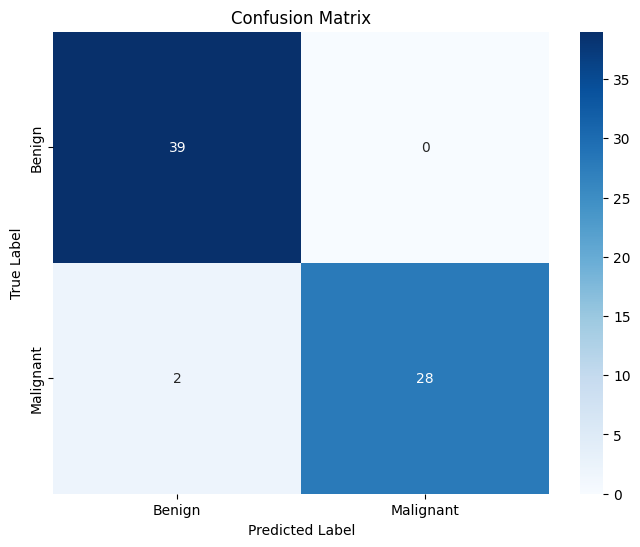

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Benign', 'Malignant']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()